# Задание Lite

Используйте готовый ноутбук с занятия.

  **1. Сделайте более мощный CVAE, обучите больше эпох до более низкого уровня ошибки и сравните изображения, которые получаются в итоге. Коррелирует ли уровень ошибки с качеством изображений?**

  **2. Подайте 5 раз в decoder CVAE один и тот же случайный вектор и любой label от 0 до 9 на выбор. Посмотрите, что сгенерирует CVAE**. 

*Пояснение: Автокодировщики работают следующим образом: сначала, энкодер кодирует данные в n-мерное пространство (выход энкодера), и кодированные данные подаются на вход декодера, чтобы сгенерить новую картинку.*

Для выполнение данного пункта, нужно провести следующий эксперимент:

1. Обучите автокодировщик

2. Разбейте его на 2 отдельные модели: энкодер и декодер. Далее понадобится только декодер

3. На вход декодера подайте 5 векторов из рандомных чисел и выведите на экран получившиеся изображения

# Подключение библиотек

Если подключать **tensorflow==1.13.0rc1** как из урока, то выводитсчя ***ошибка***, что данная версия отсутствует. 
 
В дальнейшем работа будет проводится на tensorflow версии **1.13.1**

In [1]:
!pip install tensorflow==1.13.0rc1 -q

ERROR: Could not find a version that satisfies the requirement tensorflow==1.13.0rc1 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0rc0, 2.2.0rc1, 2.2.0rc2, 2.2.0rc3, 2.2.0rc4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0rc0, 2.3.0rc1, 2.3.0rc2, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0rc0, 2.4.0rc1, 2.4.0rc2, 2.4.0rc3, 2.4.0rc4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0rc0, 2.5.0rc1, 2.5.0rc2, 2.5.0rc3, 2.5.0, 2.5.1, 2.5.2, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.7.0rc0, 2.7.0rc1, 2.7.0)
ERROR: No matching distribution found for tensorflow==1.13.0rc1


In [2]:
!pip install keras==2.0 -q
#!pip install tensorflow==1.13.0rc1 -q
!pip install tensorflow==1.13.1

     |████████████████████████████████| 191 kB 7.5 MB/s 
     |████████████████████████████████| 458.3 MB 12 kB/s 
     |████████████████████████████████| 5.6 MB 53.2 MB/s 
     |████████████████████████████████| 462 kB 39.4 MB/s 
     |████████████████████████████████| 458.3 MB 12 kB/s 
     |████████████████████████████████| 458.3 MB 12 kB/s 
     |████████████████████████████████| 454.4 MB 23 kB/s 
     |████████████████████████████████| 4.0 MB 55.6 MB/s 
     |████████████████████████████████| 1.2 MB 53.0 MB/s 
     |████████████████████████████████| 462 kB 37.2 MB/s 
     |████████████████████████████████| 92.6 MB 100 kB/s 
     |████████████████████████████████| 3.2 MB 44.7 MB/s 
     |████████████████████████████████| 50 kB 8.3 MB/s 
     |████████████████████████████████| 367 kB 76.8 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.5.0
    Uninstalling tensorflow-estimator-2.5.0:
      Successfully uninstalled tensorflow

In [2]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Reshape, Lambda
from tensorflow.keras.layers import Flatten, BatchNormalization, Conv2DTranspose
from tensorflow.keras.layers import LeakyReLU, concatenate, Conv2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import binary_crossentropy
from tensorflow.keras.datasets import mnist
from tensorflow.keras import backend as K
from tensorflow.keras.callbacks import LambdaCallback, ReduceLROnPlateau
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import plot_model, to_categorical

from IPython.display import clear_output
from scipy.stats import norm, multivariate_normal

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys

/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/dtypes.py:529: FutureWarning: Passing (type, 1) or 

# Работа с базой

## Загрузка данных

In [3]:
(xTrain, yTrain), (xTest, yTest) = mnist.load_data()       # Загрузка базы MNIST

11493376/11490434 [==============================] - 0s 0us/step


## Нормализация

In [4]:
xTrain = xTrain.astype('float32') / 255.
xTest  = xTest .astype('float32') / 255.
xTrain = np.reshape(xTrain, (len(xTrain), 28, 28, 1))
xTest  = np.reshape(xTest,  (len(xTest),  28, 28, 1))

## Категоризация

In [5]:
yTrainCat = to_categorical(yTrain, 10).astype(np.float32)
yTestCat  = to_categorical(yTest, 10).astype(np.float32)
num_classes = yTestCat.shape[1]
print('Кол-во классов:' , num_classes)

Кол-во классов: 10


In [6]:
print("xTrain: ",    xTrain.shape)
print("xTest: ",     xTest.shape)
print("yTrainCat: ", yTrainCat.shape)
print("yTestCat: ",  yTestCat.shape)

xTrain:  (60000, 28, 28, 1)
xTest:  (10000, 28, 28, 1)
yTrainCat:  (60000, 10)
yTestCat:  (10000, 10)


# Дополнительные функции

## Зададим гиперпараметры

In [7]:
latent_dim = 10                # Размера скрытого пространства
batch_size = 200
dropout_rate = 0.3

## Функция создания вариационного автокодировщика c условием

In [23]:
# Функция создания вариационного автокодировщика c условием
def create_cvae(): 
  models = {}

  # Функция Dropout и BatchNormalization
  def apply_bn_and_dropout(x):                                 # На вход принимает слой (x)
    return Dropout(dropout_rate)(BatchNormalization()(x))      # Возвращает 2 слоя

  # Энкодер
  input_img = Input(shape=(28,28,1))
  flatten_img = Flatten()(input_img)
  input_lbl = Input(shape=(num_classes,), dtype='float32')      # Второй вход в энкодер с учетом лейблов и по количеству классов

  x = concatenate([flatten_img, input_lbl])                    # Конкатенируем входы 

  # x = Dense(512, activation='relu')(x)
  # x = Dropout(dropout_rate)(x)
  # x = BatchNormalization()(x)

  x = Dense(256, activation='relu')(x)
  x = Dropout(dropout_rate)(x)
  x = BatchNormalization()(x)

  x = Dense(128, activation='relu')(x)
  x = Dropout(dropout_rate)(x)
  x = BatchNormalization()(x)

  # x = Dense(64, activation='relu')(x)
  # x = Dropout(dropout_rate)(x)
  # x = BatchNormalization()(x)

  # Предсказываем параметры распределений

  z_mean = Dense(latent_dim)(x)                                # скрытое пространство(мат.ожидание)
  z_log_var = Dense(latent_dim)(x)                             # скрытое пространство(лог.вариации)

  # Сэмплирование 
  def sampling(args):                                          # Объявляем функцию сэмплирования
    z_mean, z_log_var = args                                   # принимаем в аргументах z_mean, z_log_var

    # Нормальное распределение
    epsilon = K.random_normal(shape=(batch_size, latent_dim), mean=0., stddev=1.0)
    return z_mean + K.exp(z_log_var / 2) * epsilon
  
  # Задаем самописный слой
  l  = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

  models["encoder"]  = Model([input_img, input_lbl], l)         # Модель энкодера от входа до лямда слоя
  models["z_meaner"] = Model([input_img, input_lbl], z_mean)    # Модель от входа до z_mean
  models["z_lvarer"] = Model([input_img, input_lbl], z_log_var) # Модель от входа до z_log_var

   # Декодер
  z = Input(shape=(latent_dim, ))                               # Первая входная размерность (8,)
  input_lbl_d = Input(shape=(num_classes,), dtype='float32')    # Вторая входная размерность по номеру классов
  x = concatenate([z, input_lbl_d])

  # x = Dense(64)(x)
  # x = LeakyReLU()(x)
  # x = Dropout(dropout_rate)(x)

  x = Dense(128)(x)
  x = LeakyReLU()(x)
  x = Dropout(dropout_rate)(x)

  x = Dense(256)(x)
  x = LeakyReLU()(x)
  x = Dropout(dropout_rate)(x)

  # x = Dense(512)(x)
  # x = LeakyReLU()(x)
  # x = Dropout(dropout_rate)(x)

  x = Dense(28*28, activation='sigmoid')(x)
  decoded = Reshape((28,28,1))(x)


  #########################

  # Cобираем модель декодера
  models["decoder"] = Model([z, input_lbl_d], decoded, name='Decoder')

  # Cобираем вариационный автокодировщик с условием(3 input на входе, затем первые два проходят через энкодер,
  # складываются с input_lbl_d и всё это проходит через декодер на выходе)
  models["cvae"] = Model([input_img, input_lbl, input_lbl_d], 
                         models["decoder"]([models["encoder"]([input_img, input_lbl]), input_lbl_d]), name="CVAE")
  
  # Вместо энкодера модель z_meaner
  models["style_t"] = Model([input_img, input_lbl, input_lbl_d], 
                            models["decoder"]([models["z_meaner"]([input_img, input_lbl]), input_lbl_d]), name="style_transfer")
  
  # Cамописная функция потерь
  def vae_loss(x, decoded): 
    x = K.reshape(x, shape=(batch_size, 28*28))                                          
    decoded = K.reshape(decoded, shape=(batch_size, 28*28))                               
    xent_loss = 28 * 28 * binary_crossentropy(x, decoded)                                 
    kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)  
    return (xent_loss + kl_loss) / 2 / 28 / 28

  return models, vae_loss                                            

### Функция вывода информации (картинок)

In [10]:
# Функция отрисовки двух линий картинок - оригинальные и выходные из автокодировщика

digit_size = 28   # Задаем размер цифр

def plot_digits(*args, invert_colors=False):
  args = [x.squeeze() for x in args]
  n = min([x.shape[0] for x in args])
  figure = np.zeros((digit_size * len(args), digit_size * n))

  for i in range(n):
    for j in range(len(args)):
      figure[j * digit_size: (j + 1) * digit_size,
             i * digit_size: (i + 1) * digit_size] = args[j][i].squeeze()
  
  if invert_colors:
    figure = 1 - figure

  plt.figure(figsize=(2*n, 2*len(args)))
  plt.imshow(figure, cmap='Greys_r')                          
  plt.grid(False)
  ax = plt.gca()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

## Функция переноса стилей

In [11]:
def style_transfer(model, X, lbl_in, lbl_out):
  rows = X.shape[0]
  if isinstance(lbl_in, int):                 # Входные лейблы(энкодера), если это тип int
    lbl = lbl_in
    lbl_in = np.zeros((rows, 10))
    lbl_in[:, lbl] = 1                        # заполняем в нужную строчку единицу
  
  if isinstance(lbl_out, int):                # Выходные лейблы(энкодера), если это тип int
    lbl = lbl_out
    lbl_out = np.zeros((rows,10))
    lbl_out[:, lbl] = 1
  
  return model.predict([X, lbl_in, lbl_out])  # Возврат предсказанных картинок

## Callback

In [34]:
# Эпохи, в которые будем сохранять
save_epochs = set([i*20 for i in range(0,25)])

# Отслеживать будем на вот этих цифрах
imgs = xTest[:batch_size]
imgs_lbls = yTestCat[:batch_size]
n_compare = 10

In [35]:
# Callback
def on_epoch_end(epoch, logs):
  if epoch in save_epochs:
    clear_output()

    # Сравнение реальных и декодированных цифр
    decoded = cvae.predict([imgs, imgs_lbls, imgs_lbls], batch_size=batch_size)
    plot_digits(imgs[:n_compare], decoded[:n_compare])

pltfig = LambdaCallback(on_epoch_end = on_epoch_end)
tb = TensorBoard(log_dir='./logs')

# 1. Сделайте более мощный CVAE

In [24]:
# Получение модели и свою функции потерь
models, vae_loss = create_cvae()

In [41]:
# Задаем модели
cvae = models["cvae"]
style_t = models["style_t"]
decoder = models["decoder"]

In [26]:
# Компилируем модель
cvae.compile(optimizer=Adam(0.0001), loss=vae_loss)

## Обучение

60000/60000 [==============================] - 20s 330us/sample - loss: 0.1000 - val_loss: 0.0911
Epoch 12/20
60000/60000 [==============================] - 18s 294us/sample - loss: 0.0987 - val_loss: 0.0899
Epoch 13/20
60000/60000 [==============================] - 17s 291us/sample - loss: 0.0975 - val_loss: 0.0887
Epoch 14/20
60000/60000 [==============================] - 17s 288us/sample - loss: 0.0966 - val_loss: 0.0877
Epoch 15/20
60000/60000 [==============================] - 18s 293us/sample - loss: 0.0956 - val_loss: 0.0868
Epoch 16/20
60000/60000 [==============================] - 18s 292us/sample - loss: 0.0949 - val_loss: 0.0861
Epoch 17/20
60000/60000 [==============================] - 17s 290us/sample - loss: 0.0942 - val_loss: 0.0853
Epoch 18/20
60000/60000 [==============================] - 17s 289us/sample - loss: 0.0935 - val_loss: 0.0848
Epoch 19/20
60000/60000 [==============================] - 17s 285us/sample - loss: 0.0930 - val_loss: 0.0842
Epoch 20/20
60000/6000

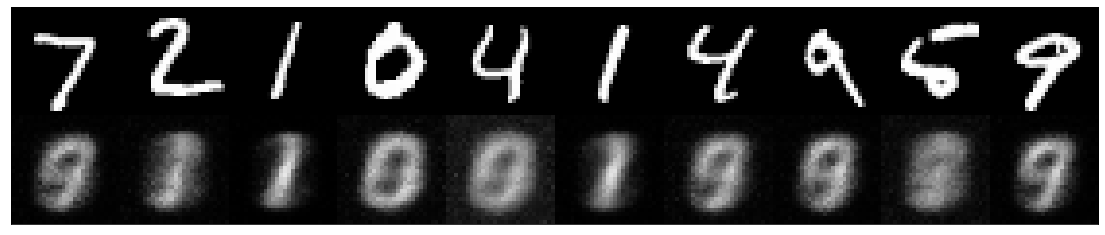

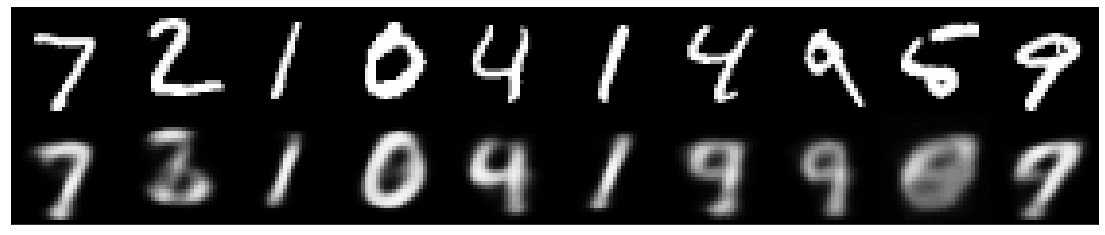

In [27]:
cvae.fit([xTrain, yTrainCat, yTrainCat], xTrain, shuffle=True, epochs=20, 
         batch_size=batch_size, validation_data=([xTest, yTestCat, yTestCat], xTest),
         callbacks=[pltfig, tb], verbose=1)  

# Проверка результата 

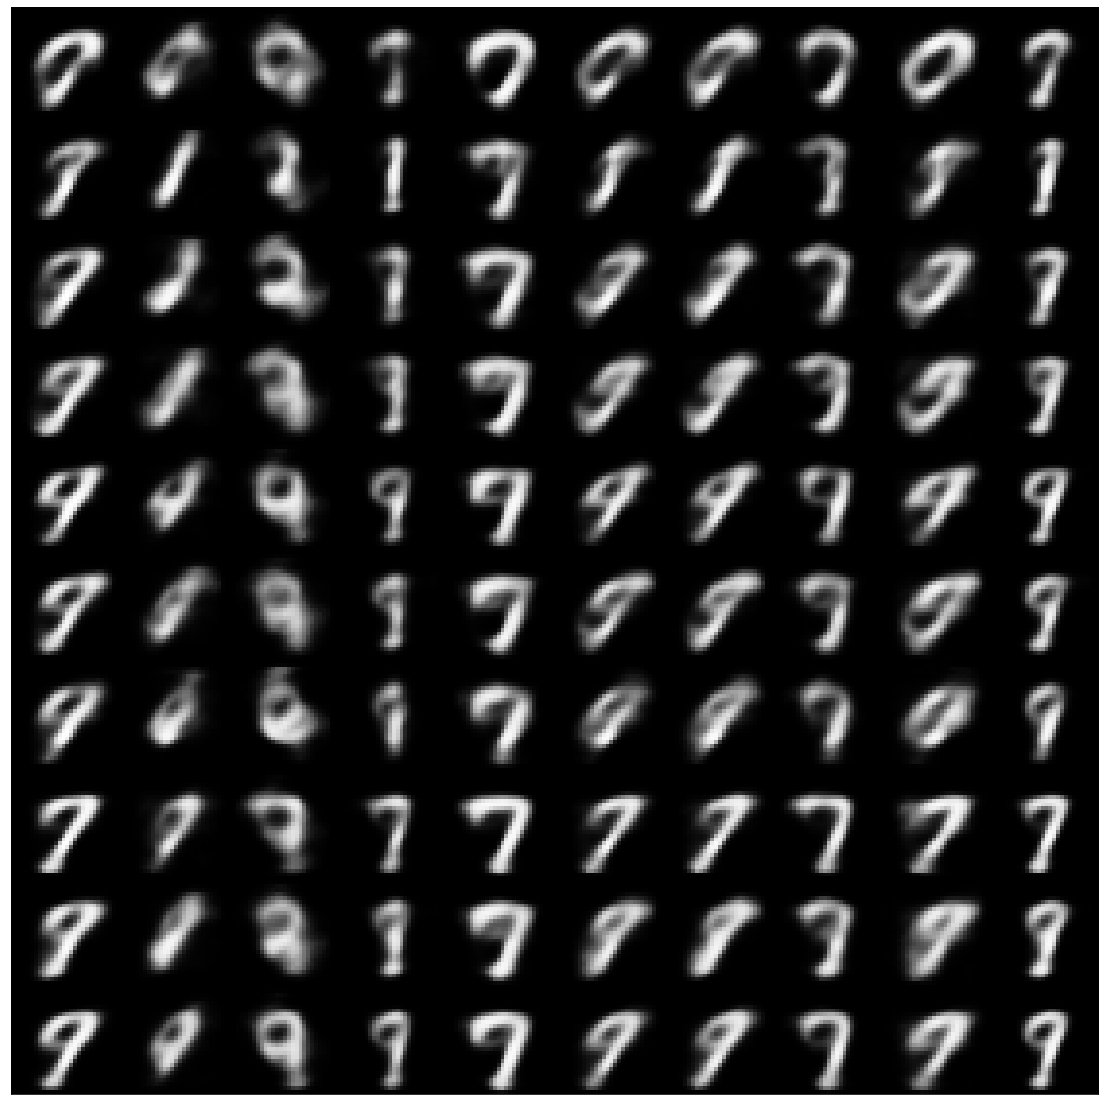

In [28]:
n = 10                                                       # Количество картинок
lbl = 7                                                      # Лейбл
generated = []                                               # Список сгенерированных картинок
prot = xTrain[yTrain == lbl][:n]                             # Возьмем prot в качестве x с соответствующим выбранному значению лейбла 

for i in range(num_classes):                                 # Проходим по каждому классу
    generated.append(style_transfer(style_t, prot, lbl, i))  #  Генерируем картинки с учетом переноса стиля

plot_digits(*generated, invert_colors=False)  

# Дообучим сеть 

In [29]:
# Компилируем модель
cvae.compile(optimizer=Adam(0.00005), loss=vae_loss)

60000/60000 [==============================] - 19s 313us/sample - loss: 0.0871 - val_loss: 0.0783
Epoch 42/50
60000/60000 [==============================] - 19s 308us/sample - loss: 0.0872 - val_loss: 0.0782
Epoch 43/50
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0871 - val_loss: 0.0781
Epoch 44/50
60000/60000 [==============================] - 19s 312us/sample - loss: 0.0871 - val_loss: 0.0781
Epoch 45/50
60000/60000 [==============================] - 19s 312us/sample - loss: 0.0869 - val_loss: 0.0781
Epoch 46/50
60000/60000 [==============================] - 19s 310us/sample - loss: 0.0869 - val_loss: 0.0780
Epoch 47/50
60000/60000 [==============================] - 19s 309us/sample - loss: 0.0868 - val_loss: 0.0779
Epoch 48/50
60000/60000 [==============================] - 18s 308us/sample - loss: 0.0868 - val_loss: 0.0778
Epoch 49/50
60000/60000 [==============================] - 18s 307us/sample - loss: 0.0867 - val_loss: 0.0778
Epoch 50/50
60000/6000

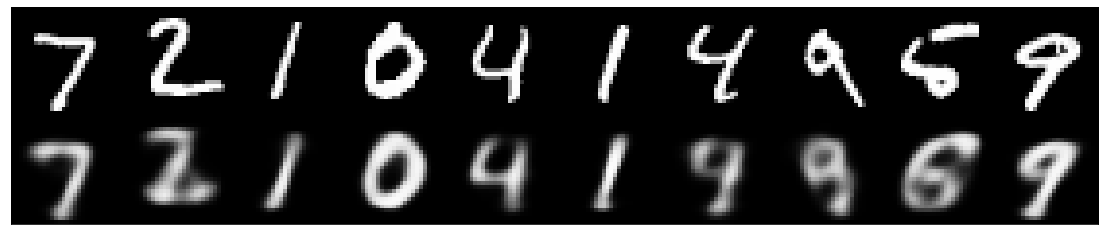

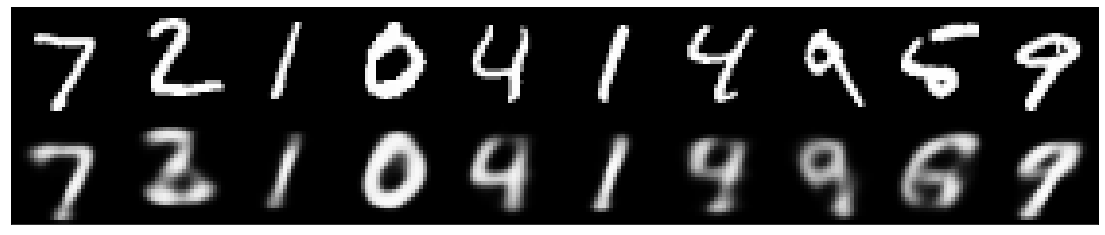

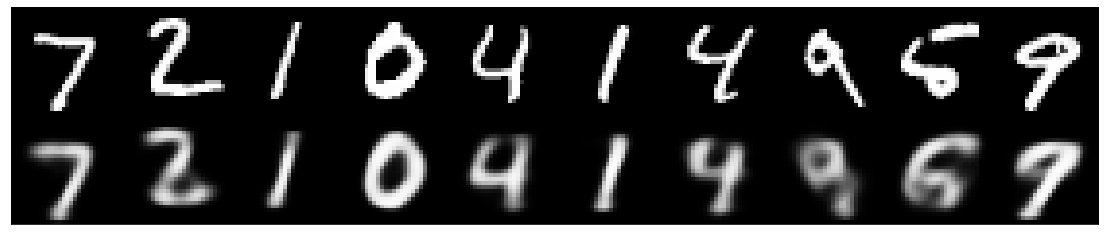

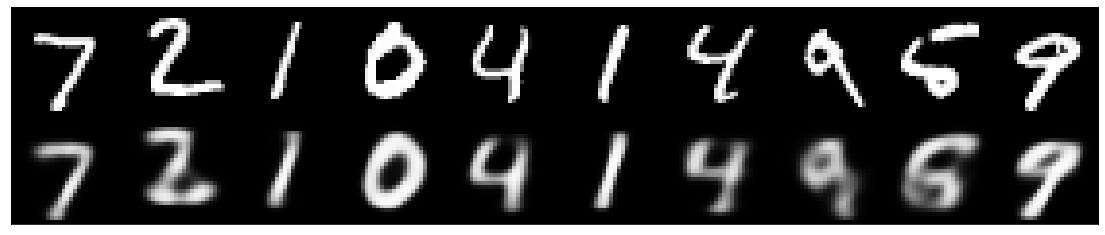

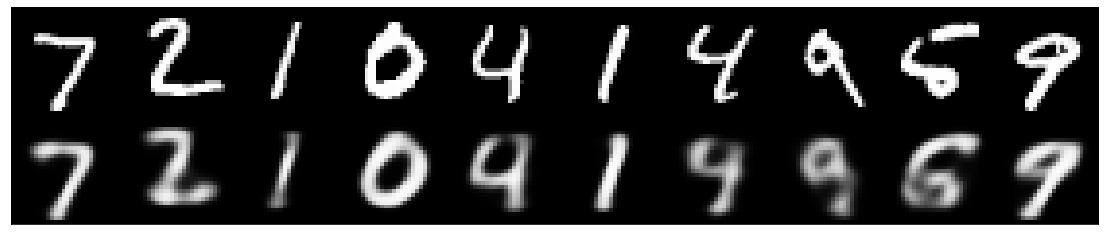

In [30]:
cvae.fit([xTrain, yTrainCat, yTrainCat], xTrain, shuffle=True, epochs=50, 
         batch_size=batch_size, validation_data=([xTest, yTestCat, yTestCat], xTest), 
         callbacks=[pltfig, tb], verbose=1)

# Проверка результата после дообучения

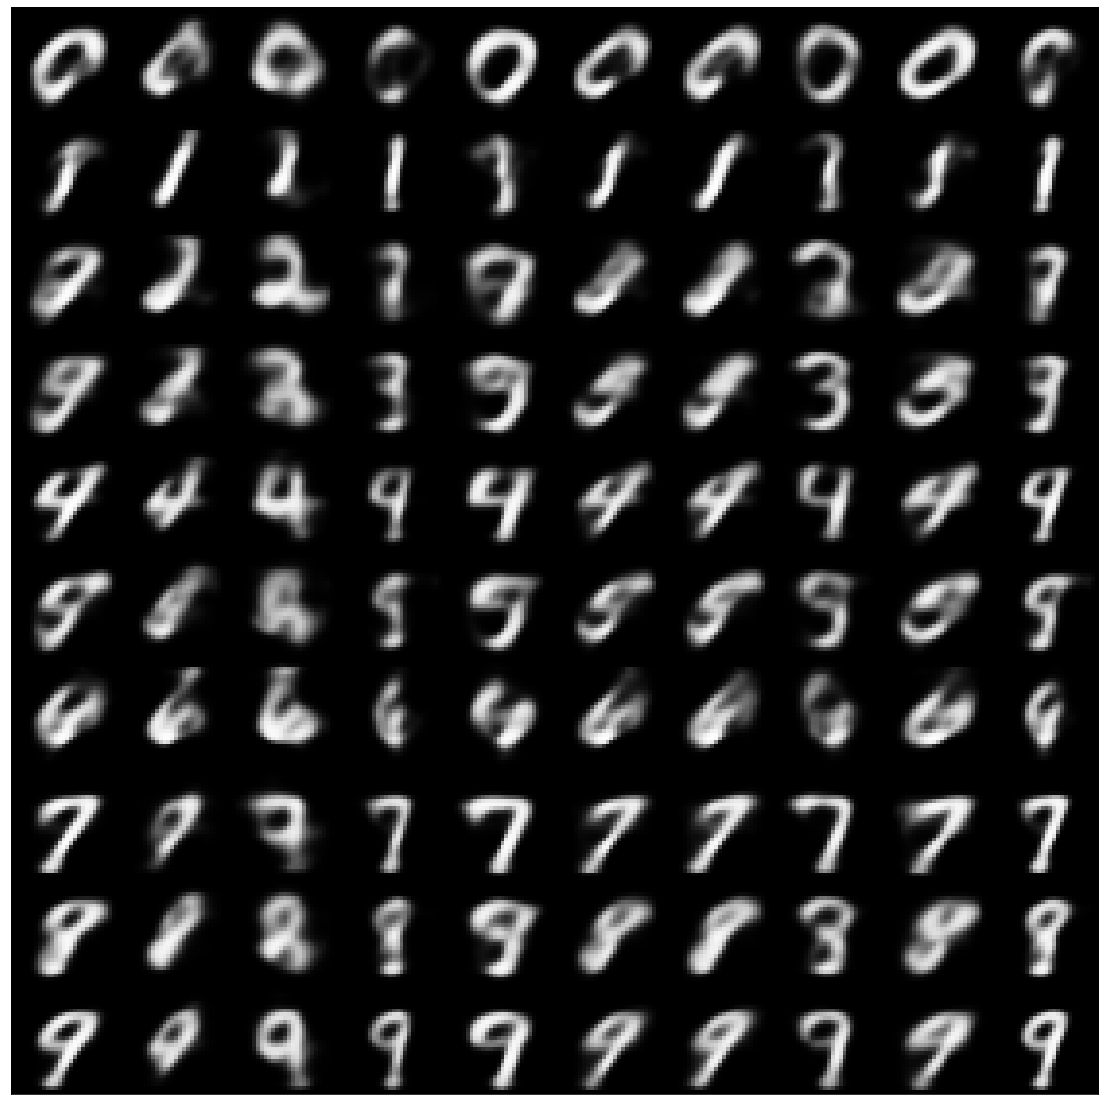

In [31]:
n = 10                                                       # Количество картинок
lbl = 7                                                      # Лейбл
generated = []                                               # Список сгенерированных картинок
prot = xTrain[yTrain == lbl][:n]                             # Возьмем prot в качестве x с соответствующим выбранному значению лейбла 

for i in range(num_classes):                                 # Проходим по каждому классу
    generated.append(style_transfer(style_t, prot, lbl, i))  #  Генерируем картинки с учетом переноса стиля

plot_digits(*generated, invert_colors=False)  

# 2. Подайте 5 раз в decoder CVAE один и тот же случайный вектор и любой label от 0 до 9 на выбор.

In [58]:
# rand_norm = np.random.normal(0,1,10).reshape(1,10)
# rand_norm.shape

(1, 10)

In [56]:
# leb = to_categorical(2,10).reshape(1,10)
# leb

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

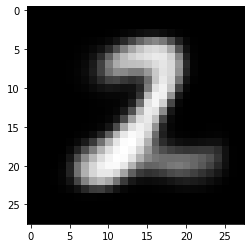

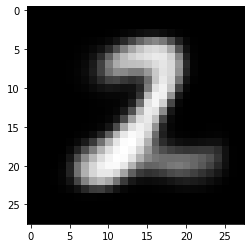

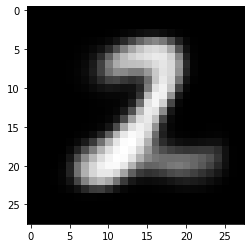

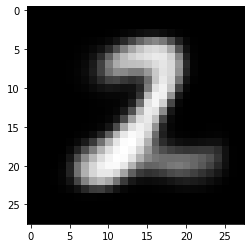

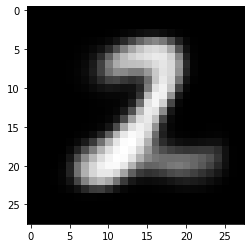

In [64]:
rand_norm = np.random.normal(0,1,10).reshape(1,10)  # Задаем нормальное распределение размерностью (1,10)
leb = to_categorical(2,10).reshape(1,10)            # Задаем лейбл в формате OHE, так же размерностью (1,10)
for i in range(5):                                  # Цикл из 5 итераций
  pred = decoder.predict([rand_norm,leb])           # Предикт декодера
  input = pred.reshape((28,28))                     # Изменение размерности
  plt.imshow(input, cmap='gray')                    # Отображение
  plt.show()

# Дополнительно

**В цикле будем подавать 5 раз один и тот же вектор на каждую цифру**

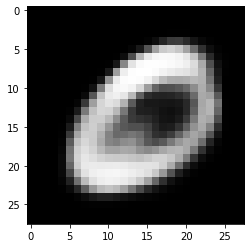

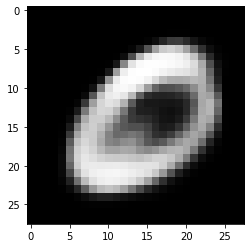

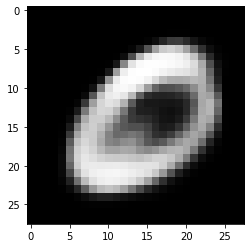

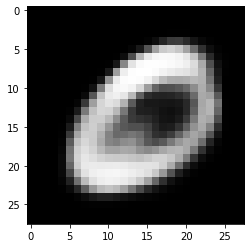

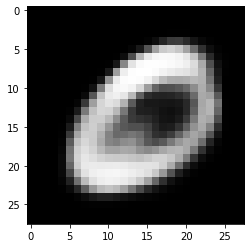

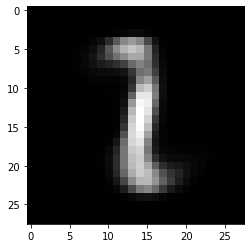

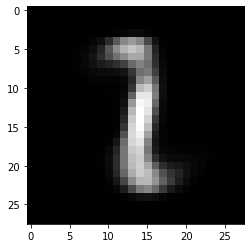

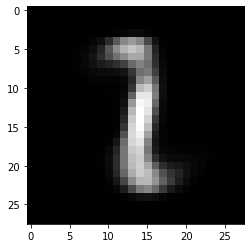

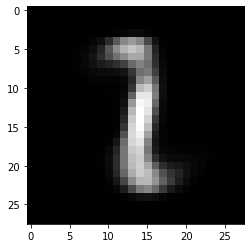

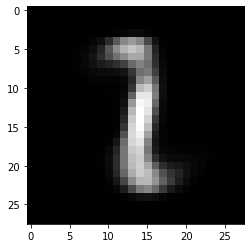

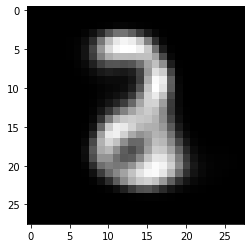

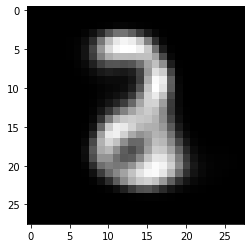

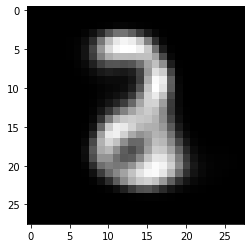

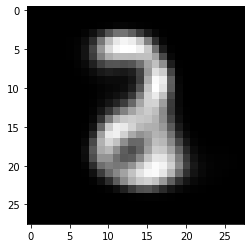

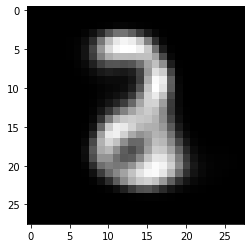

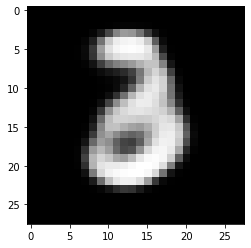

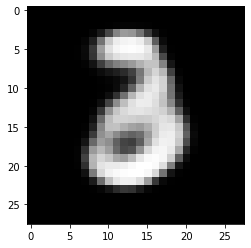

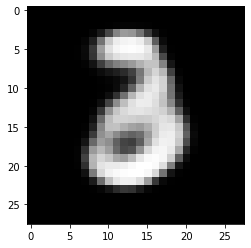

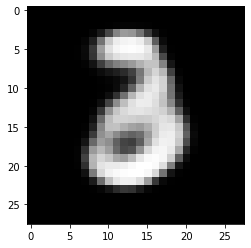

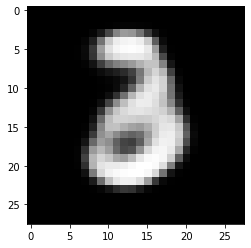

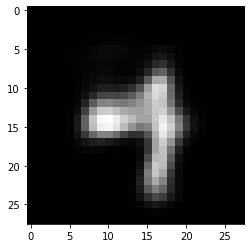

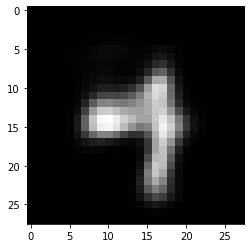

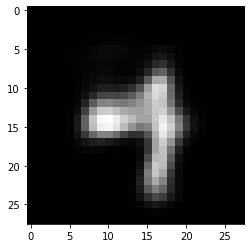

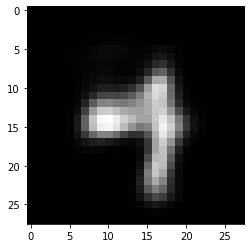

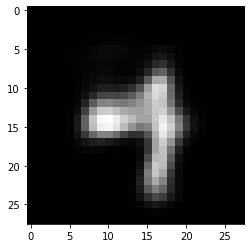

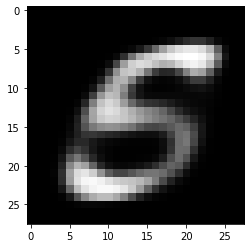

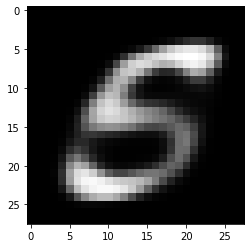

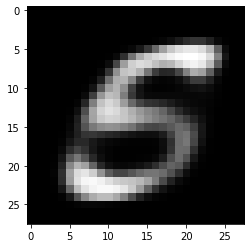

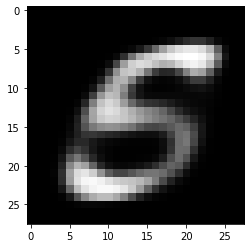

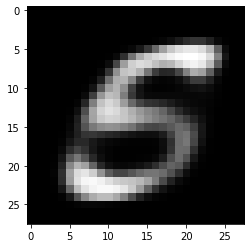

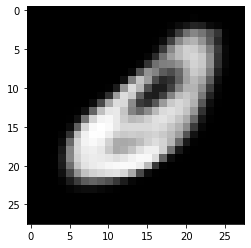

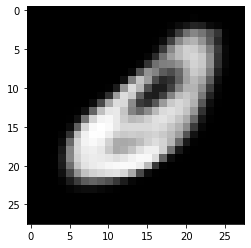

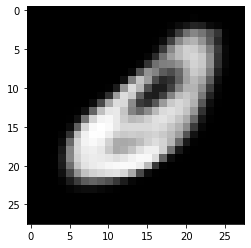

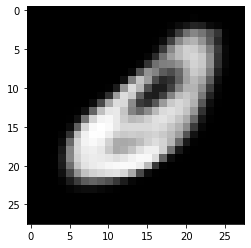

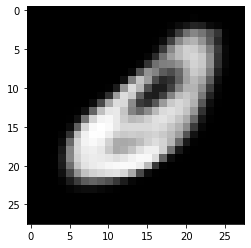

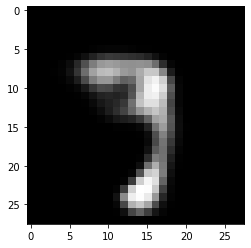

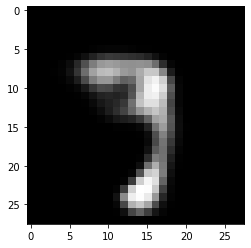

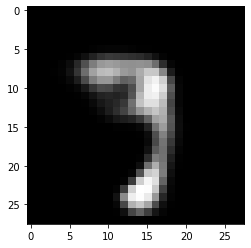

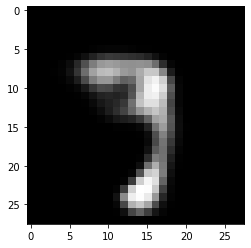

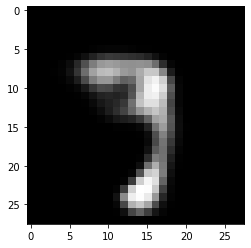

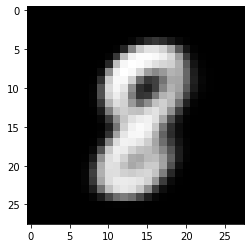

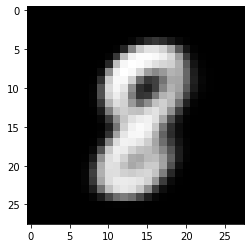

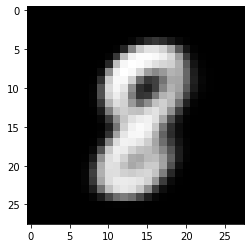

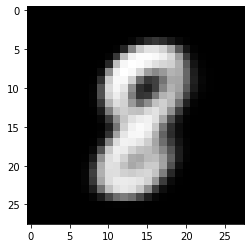

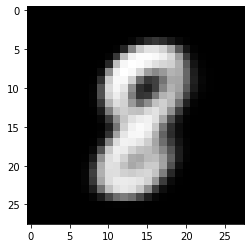

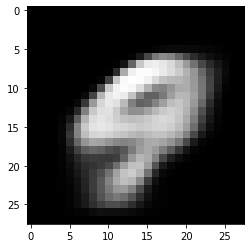

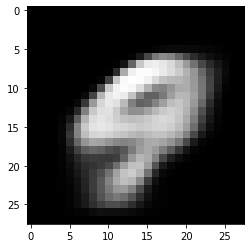

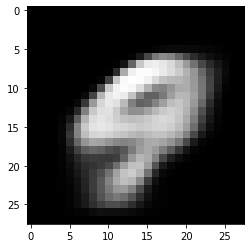

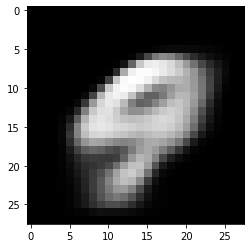

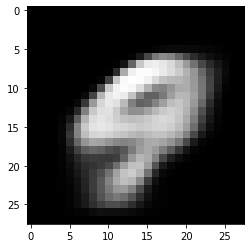

In [65]:
for num in range(10):
  rand = np.random.normal(0,1,10).reshape(1,10) 
  dig = to_categorical(num,10).reshape(1,10) 
  for i in range(5):
    pred = decoder.predict([rand,dig])
    input = pred.reshape((28,28))
    plt.imshow(input, cmap='gray')
    plt.show()

# Еще 

 Можно подать в decoderодин и тот же случайный вектор и изменить label от 0 до 9. 

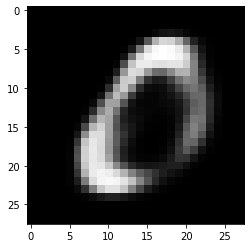

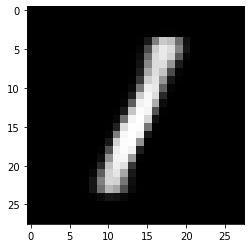

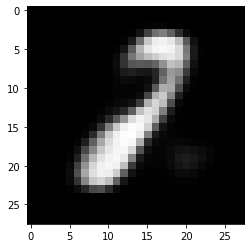

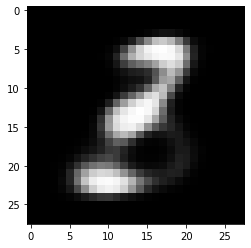

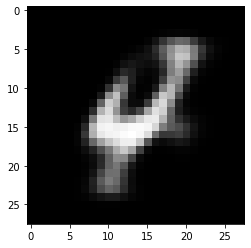

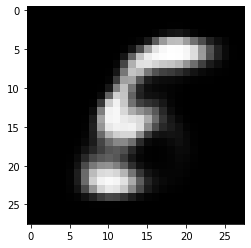

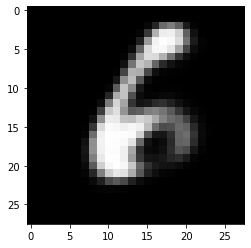

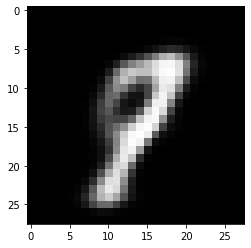

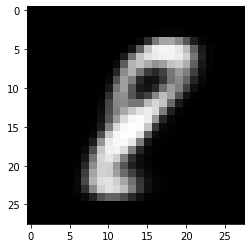

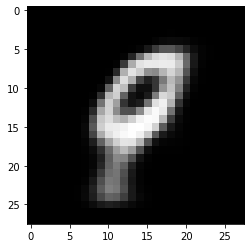

In [53]:
rand_vec = np.random.normal(0, 1, latent_dim)          # Формируем случайный вектор длиной latent_dim с нормальным распределением   
rand_vec = np.expand_dims(rand_vec, axis = 0)          # Измение размерности
input_lbl_d = np.zeros([1, latent_dim])   
for i in range(num_classes):                           # По каждому классу (от 0 до 9)
  input_lbl_d = np.zeros([1, latent_dim])              # Формируем массив из 0
  input_lbl_d[0,i] = 1.0                               # Формируем метку 
  nose_pred = decoder.predict([rand_vec, input_lbl_d]) # Результат предсказания на выходе декодера 
  nose_pred = nose_pred.reshape(28,28)
  plt.imshow(nose_pred, cmap='Greys_r') 
  plt.show()

# Выводы:

1. Для создание более мощного **CVAE** было проведено много экспериментов. И добавление новых слоев с большим кол-вом нейронов не довало положительного эффекта.
2. После дообучения с уменьшением шага **lr** можно увидеть что уровень ошибки коррелирует с качеством изображений. Из этого можно сдлелать вывод что с уменьшением ошибки возрастает четкость деталей изображения.
3. Если подавать случайный вектор в декодер, то каждый раз формируется новое изображение(цифра).
4. В отличие от **VAE** в **CVAE** можно перенести стиль.